# Disponibilidad de bicicletas por estación según horario

In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
plt.style.use('default')
plt.rcParams['figure.figsize']=(17,8)

In [26]:
station = pd.read_csv('station.csv')
station.isnull().any()
station.count()

id                   70
name                 70
lat                  70
long                 70
dock_count           70
city                 70
installation_date    70
dtype: int64

In [27]:
status = pd.read_csv('status_red.csv')
status.isnull().any()
status.count()

station_id         2109467
bikes_available    2109467
docks_available    2109467
start_time         2109467
end_time           2109467
dtype: int64

In [76]:
status['start_time'] = pd.to_datetime(status['start_time'], format = '%Y/%m/%d %H:%M:%S')
status['end_time'] = pd.to_datetime(status['end_time'], format = '%Y/%m/%d %H:%M:%S')
status['start_time_anio'] = pd.DatetimeIndex(status['start_time']).year
status['start_time_mes'] = pd.DatetimeIndex(status['start_time']).month
status['start_time_dia'] = pd.DatetimeIndex(status['start_time']).day
status['start_time_hora'] = pd.DatetimeIndex(status['start_time']).hour
status['start_time_dia_semana'] = pd.DatetimeIndex(status['start_time']).dayofweek
#status['start_time_minuto'] = pd.DatetimeIndex(status['start_time']).minute
status['end_time_anio'] = pd.DatetimeIndex(status['end_time']).year
status['end_time_mes'] = pd.DatetimeIndex(status['end_time']).month
status['end_time_dia'] = pd.DatetimeIndex(status['end_time']).day
status['end_time_hora'] = pd.DatetimeIndex(status['end_time']).hour
status['end_time_dia_semana'] = pd.DatetimeIndex(status['end_time']).dayofweek
#status['end_time_minuto'] = pd.DatetimeIndex(status['end_time']).minute
# Obtengo la duracion en segundos del intervalo
status['duration'] = (status['end_time'] - status['start_time']) / np.timedelta64(1,'s')

status.head()


,station_id,bikes_available,docks_available,start_time,end_time,start_time_anio,start_time_mes,start_time_dia,start_time_hora,start_time_dia_semana,end_time_anio,end_time_mes,end_time_dia,end_time_hora,end_time_dia_semana,duration
0,2,2,25,2013-08-29 12:06:01,2013-08-29 13:10:02,2013,8,29,12,3,2013,8,29,13,3,3841
1,2,3,24,2013-08-29 13:11:01,2013-08-29 13:52:01,2013,8,29,13,3,2013,8,29,13,3,2460
2,2,2,25,2013-08-29 13:53:02,2013-08-29 17:17:01,2013,8,29,13,3,2013,8,29,17,3,12239
3,2,3,24,2013-08-29 17:18:01,2013-08-29 17:19:01,2013,8,29,17,3,2013,8,29,17,3,60
4,2,4,23,2013-08-29 17:20:01,2013-08-29 17:34:01,2013,8,29,17,3,2013,8,29,17,3,840


In [77]:
station.rename(columns={'id': 'station_id'}, inplace=True)

station_status = pd.merge(station,status,how='left',on=['station_id'])

# Momentos en los que no hay bicicletas disponibles

La cantidad de intervalos en los que no hay bicicletas disponibles es:
18962
La cantidad reducida de intervalos resulta en:
18740


<IPython.core.display.Javascript object>


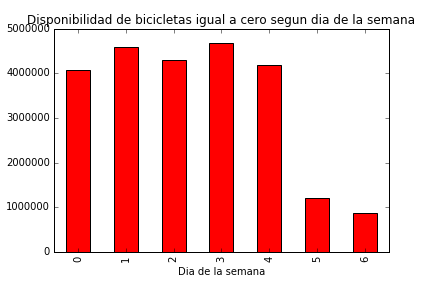

In [89]:
%matplotlib notebook

momentos_sin_bicis_totales = station_status.loc[station_status['bikes_available'] == 0,:]
print "La cantidad de intervalos en los que no hay bicicletas disponibles es:"
print momentos_sin_bicis_totales.count()['station_id']

# Para simplificar nos quedamos con los intervalos de disponibilidad que pertenecen a un mismo dia, ya que la cantidad de valores despreciados es minima
momentos_sin_bicis = momentos_sin_bicis_totales.loc[station_status['start_time_dia_semana'] == station_status['end_time_dia_semana'],:]
momentos_sin_bicis.count()
print "La cantidad reducida de intervalos resulta en:"
print momentos_sin_bicis.count()['station_id']

momentos_por_dia = momentos_sin_bicis.groupby('start_time_dia_semana').sum()['duration']
momentos_por_dia.head()

plot=momentos_por_dia.plot(kind='bar',title='Disponibilidad de bicicletas igual a cero segun dia de la semana', color='red')
plot.set_ylabel('Duracion acumulada en segundos de los intervalos')
plot.set_xlabel('Dia de la semana')


# Cantidad de bicicletas disponibles durante el horario pico (7:00 - 9:00 y 16:00 - 18:00)

In [ ]:
%matplotlib notebook
analisis_hora_pico = station_status.loc[((station_status['start_time_hora']<=7) & (station_status['end_time_hora']>=7)) | \
                                        ((station_status['start_time_hora']>7) & (station_status['start_time_hora']<=9)) |\
                                        ((station_status['start_time_hora']<=16) & (station_status['end_time_hora']>=16)) |\
                                        ((station_status['start_time_hora']>16) & (station_status['start_time_hora']<=18)),:]
plt.figure(figsize = [25,9])
sc = plt.scatter(analisis_hora_pico['station_id'],analisis_hora_pico['bikes_available'],alpha=0.25)
plt.title('Cantidad de bicicletas disponibles segun estacion en horario pico')
plt.xlabel('Id Estacion')
plt.ylabel('Cantidad de bicicletas disponibles')
plt.xticks(station['station_id'])
plt.yticks(range(0,28))

# Cantidad de bicicletas disponibles durante el fin de semana

<IPython.core.display.Javascript object>


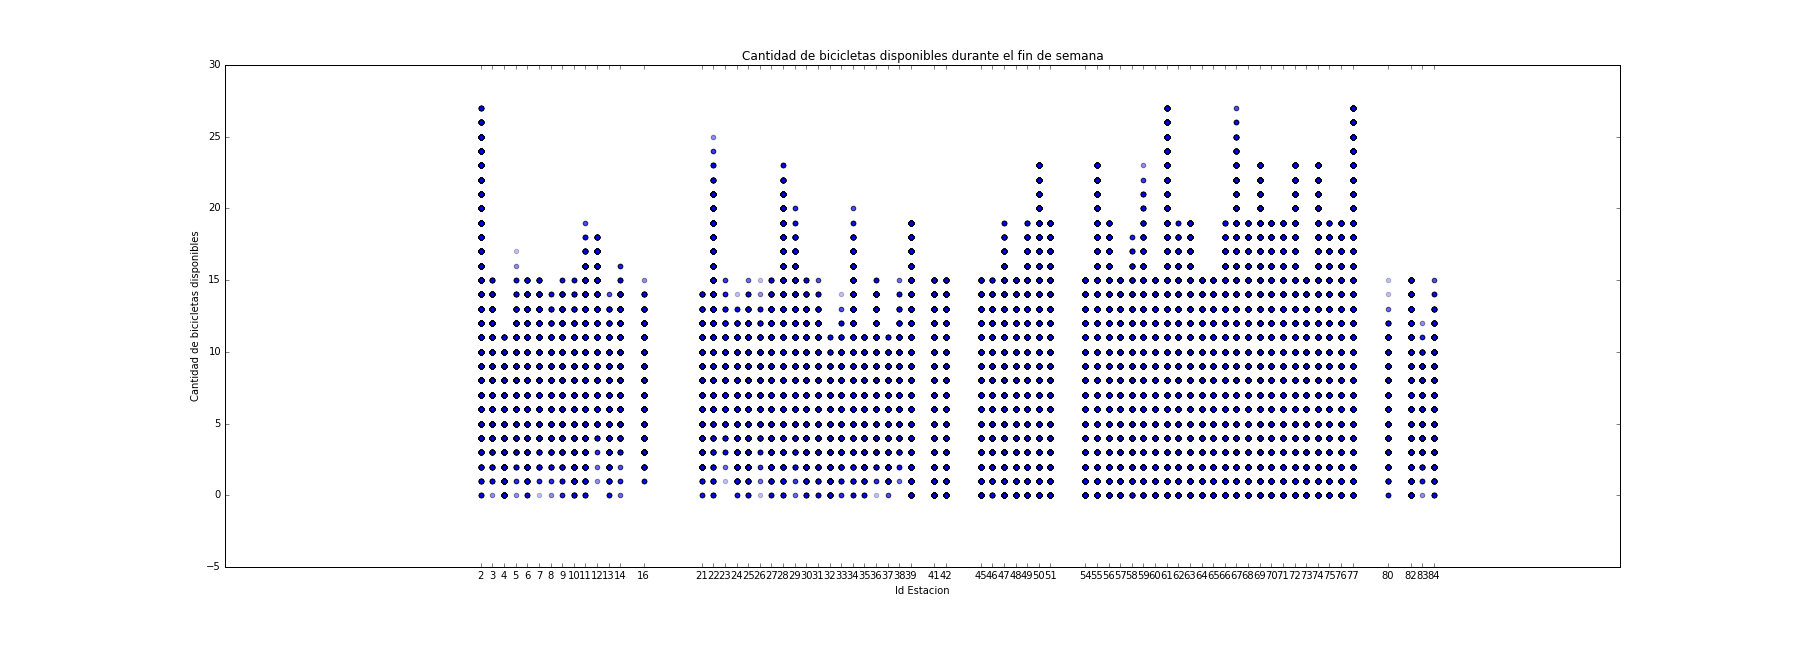

([<matplotlib.axis.XTick at 0x7f9bb8deabd0>,
 <a list of 70 Text xticklabel objects>)

In [91]:
%matplotlib notebook
analisis_fin_de_semana = station_status.loc[((station_status['start_time_dia_semana']<=5) & (station_status['end_time_hora']>=5)) | \
                                        (station_status['start_time_dia_semana']==6),:]
plt.figure(figsize = [25,9])
sc = plt.scatter(analisis_hora_pico['station_id'],analisis_hora_pico['bikes_available'],alpha=0.25)
plt.title('Cantidad de bicicletas disponibles durante el fin de semana')
plt.xlabel('Id Estacion')
plt.ylabel('Cantidad de bicicletas disponibles')
plt.xticks(station['station_id'])